# AT&T Hackathon Brno

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np

# 1 Preprocessing, Feature Engineering

In [227]:
data_supervised = pd.read_csv("./ML_DATASET_Hackathon_Supervised.csv").dropna().drop_duplicates().drop('Unnamed: 0', axis=1)
data_supervised.head()

,Ticket,Problem_Abstract,Ticket_Type,Team,Ticket_Opened_Date,Ticket_Closed
0,272431733,The CUC Database is not running on DURPRIPT7B,User,Prognosis,12/18/2019 14:20,7/27/2022 20:49
1,271472293,OPEN CR:Alerts not being generated - trap ba...,User,SMARTS/GFP_CPE,11/20/2019 18:33,12/23/2021 10:44
2,256576476,Enhancement to TWB Portal GPS SYNC Reports - A...,User,INCM (Voyence),2/19/2019 19:34,8/12/2022 16:35
3,271503232,Duplicated/ triplicated exceptions on Exceptio...,User,ATTLAS,11/21/2019 13:11,11/7/2021 11:22
4,277339571,"vnsd90, HPE account, JuniperRPM VitalArt issue",User,VitalNet Problems or Errors,5/8/2020 22:38,12/23/2021 10:44


In [228]:
data_supervised.describe()

,Ticket
count,4.739000e+03
mean,3.089827e+08
std,4.744033e+06
min,2.565765e+08
25%,3.067633e+08
50%,3.093422e+08
75%,3.121354e+08
max,3.154674e+08


In [229]:
data_supervised[['Ticket_Opened_Date', 'Ticket_Closed']] = data_supervised[['Ticket_Opened_Date', 'Ticket_Closed']].apply(pd.to_datetime)

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [251]:
def get_datetime_features(df):
    """
    Add datetime features to the dataset
    :param df:
    :return: pd.DataFrame
    """

    data_transformed = df.copy()
    data_transformed['open_day_of_week'] = data_transformed['Ticket_Opened_Date'].dt.dayofweek.astype("int")
    data_transformed['close_day_of_week'] = data_transformed['Ticket_Closed'].dt.dayofweek.astype("int")
    data_transformed['open_calender_week'] = data_transformed['Ticket_Opened_Date'].dt.week
    data_transformed['close_calender_week'] = data_transformed['Ticket_Closed'].dt.week
    data_transformed['open_month'] = data_transformed['Ticket_Opened_Date'].dt.month.astype("int")
    data_transformed['close_month'] = data_transformed['Ticket_Closed'].dt.month.astype("int")
    data_transformed['open_year'] = data_transformed['Ticket_Opened_Date'].dt.year.astype("int")
    data_transformed['close_year'] = data_transformed['Ticket_Closed'].dt.year.astype("int")
    data_transformed['is_friday'] = np.where(data_transformed['open_day_of_week'] == 4, 1, 0)
    data_transformed['duration'] = data_transformed['Ticket_Closed'] - data_transformed['Ticket_Opened_Date']
    data_transformed['hr_duration'] = data_transformed['duration']/np.timedelta64(1, 'h')

    return data_transformed

In [231]:
data_supervised['open_day_of_week'] = data_supervised['Ticket_Opened_Date'].dt.dayofweek.astype("int")
data_supervised['close_day_of_week'] = data_supervised['Ticket_Closed'].dt.dayofweek.astype("int")
data_supervised['open_calender_week'] = data_supervised['Ticket_Opened_Date'].dt.week
data_supervised['close_calender_week'] = data_supervised['Ticket_Closed'].dt.week
data_supervised['open_month'] = data_supervised['Ticket_Opened_Date'].dt.month.astype("int")
data_supervised['close_month'] = data_supervised['Ticket_Closed'].dt.month.astype("int")
data_supervised['open_year'] = data_supervised['Ticket_Opened_Date'].dt.year.astype("int")
data_supervised['close_year'] = data_supervised['Ticket_Closed'].dt.year.astype("int")
data_supervised['is_friday'] = np.where(data_supervised['open_day_of_week'] == 4, 1, 0)
data_supervised['duration'] = data_supervised['Ticket_Closed'] - data_supervised['Ticket_Opened_Date']
data_supervised['hr_duration'] = data_supervised['duration']/np.timedelta64(1, 'h')
data_supervised = pd.concat([data_supervised['Team'], pd.get_dummies(data_supervised, columns=['Team'])], axis=1)



C:\Users\A200083283\AppData\Local\Temp\ipykernel_3784\3195331666.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_supervised['open_calender_week'] = data_supervised['Ticket_Opened_Date'].dt.week
C:\Users\A200083283\AppData\Local\Temp\ipykernel_3784\3195331666.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_supervised['close_calender_week'] = data_supervised['Ticket_Closed'].dt.week


In [232]:
data_supervised.drop_duplicates(subset=['Problem_Abstract', 'open_calender_week', 'Team'])

,Team,Ticket,Problem_Abstract,Ticket_Type,Ticket_Opened_Date,Ticket_Closed,Duration,hr_duration,open_day_of_week,close_day_of_week,...,Team_Unified Task Management System (UTMS),Team_VitalNet Problems or Errors,Team_cback,Team_global outage | UD,Team_iGEMS CoE,Team_iGEMS-NG (NextGEMS),Team_iGEMS-NG (NextGEMS) - New Customer,Team_iGEMS-NG (NextGEMS) - Other,Team_iGems Orchestrator,Team_iNote
0,Prognosis,272431733,The CUC Database is not running on DURPRIPT7B,User,2019-12-18 14:20:00,2022-07-27 20:49:00,952 days 06:29:00,22854.483333,2,2,...,0,0,0,0,0,0,0,0,0,0
1,SMARTS/GFP_CPE,271472293,OPEN CR:Alerts not being generated - trap ba...,User,2019-11-20 18:33:00,2021-12-23 10:44:00,763 days 16:11:00,18328.183333,2,3,...,0,0,0,0,0,0,0,0,0,0
2,INCM (Voyence),256576476,Enhancement to TWB Portal GPS SYNC Reports - A...,User,2019-02-19 19:34:00,2022-08-12 16:35:00,1269 days 21:01:00,30477.016667,1,4,...,0,0,0,0,0,0,0,0,0,0
3,ATTLAS,271503232,Duplicated/ triplicated exceptions on Exceptio...,User,2019-11-21 13:11:00,2021-11-07 11:22:00,716 days 22:11:00,17206.183333,3,6,...,0,0,0,0,0,0,0,0,0,0
4,VitalNet Problems or Errors,277339571,"vnsd90, HPE account, JuniperRPM VitalArt issue",User,2020-05-08 22:38:00,2021-12-23 10:44:00,593 days 12:06:00,14244.100000,4,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,GTAC - Other,312147646,Add new users to the Existing Domain Name: MS...,User,2022-07-29 17:39:00,2022-08-02 19:13:00,4 days 01:34:00,97.566667,4,1,...,0,0,0,0,0,0,0,0,0,0
4737,GTAC - Other,312152059,Add new users to the Existing Domain Name: MSS...,User,2022-07-29 20:34:00,2022-08-01 16:11:00,2 days 19:37:00,67.616667,4,0,...,0,0,0,0,0,0,0,0,0,0
4738,VitalNet Problems or Errors,312229727,Need password reset,User,2022-08-02 16:42:00,2022-08-02 21:33:00,0 days 04:51:00,4.850000,1,1,...,0,1,0,0,0,0,0,0,0,0
4739,GTAC,312605830,Customer needs access MSS_WOKA domain. This is...,User,2022-08-16 19:08:00,2022-08-24 14:38:00,7 days 19:30:00,187.500000,1,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.to_datetime()

In [256]:
import holidays
import datetime

def generate_calendar_based_features(country_name, datetime_index):
    """
    Generates calendar-based exogenous features based on a datetime index (month of the year, if the day is a holiday)
    :param country_name: str
    :param datetime_index: pd.DatetimeIndex
    :return: pd.DataFrame
    """
    X_dataframe = pd.DataFrame(index=datetime_index)
    years_list = datetime_index.year.unique()
    country_specific_holidays = get_country_holidays(country_name, years_list)
    X_dataframe['month'] = X_dataframe.index.month
    X_dataframe['dayoftheweek'] = X_dataframe.index.dayofweek
    X_dataframe['year'] = X_dataframe.index.year
    X_dataframe['is_holiday'] = [1 if x.date() in country_specific_holidays else 0 for x in X_dataframe.index]

    return X_dataframe

def get_country_holidays(country_name, years_list):
    """
    Based on a country name, it generates the holidays for that country.
    :param country_name:  str
    :param years_list: list of int
    :return: list of str
    """
    holidays_list = holidays.country_holidays(country=country_name, years=years_list)
    dates_list = list(holidays_list.keys())

    additional_holidays_list = []
    for each_year in years_list:
        additional_holidays_list.append(datetime.date(each_year, 12, 31))
        additional_holidays_list.append(datetime.date(each_year, 12, 24))

    return dates_list+additional_holidays_list

In [257]:
get_country_holidays("Czechia", [i for i in range(2020, 2023)])

[datetime.date(2020, 1, 1),
 datetime.date(2020, 4, 10),
 datetime.date(2020, 4, 13),
 datetime.date(2020, 5, 1),
 datetime.date(2020, 5, 8),
 datetime.date(2020, 7, 5),
 datetime.date(2020, 7, 6),
 datetime.date(2020, 9, 28),
 datetime.date(2020, 10, 28),
 datetime.date(2020, 11, 17),
 datetime.date(2020, 12, 24),
 datetime.date(2020, 12, 25),
 datetime.date(2020, 12, 26),
 datetime.date(2021, 1, 1),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 4, 5),
 datetime.date(2021, 5, 1),
 datetime.date(2021, 5, 8),
 datetime.date(2021, 7, 5),
 datetime.date(2021, 7, 6),
 datetime.date(2021, 9, 28),
 datetime.date(2021, 10, 28),
 datetime.date(2021, 11, 17),
 datetime.date(2021, 12, 24),
 datetime.date(2021, 12, 25),
 datetime.date(2021, 12, 26),
 datetime.date(2022, 1, 1),
 datetime.date(2022, 4, 15),
 datetime.date(2022, 4, 18),
 datetime.date(2022, 5, 1),
 datetime.date(2022, 5, 8),
 datetime.date(2022, 7, 5),
 datetime.date(2022, 7, 6),
 datetime.date(2022, 9, 28),
 datetime.date(2022, 

In [ ]:
pd.to_datetime(data_supervised[''])

In [260]:
generate_calendar_based_features("Czechia", data_supervised[['Ticket_Opened_Date']])

AttributeError: 'DataFrame' object has no attribute 'year'

In [233]:
data_supervised.loc[data_supervised.duplicated(
    subset=['Problem_Abstract', 'open_calender_week', 'Team'],
    keep=False)].sort_values(by=['Problem_Abstract'])

,Team,Ticket,Problem_Abstract,Ticket_Type,Ticket_Opened_Date,Ticket_Closed,Duration,hr_duration,open_day_of_week,close_day_of_week,...,Team_Unified Task Management System (UTMS),Team_VitalNet Problems or Errors,Team_cback,Team_global outage | UD,Team_iGEMS CoE,Team_iGEMS-NG (NextGEMS),Team_iGEMS-NG (NextGEMS) - New Customer,Team_iGEMS-NG (NextGEMS) - Other,Team_iGems Orchestrator,Team_iNote
2532,GTAC,309790803,Add feature to the GTAC web,User,2022-05-05 12:12:00,2022-05-05 12:18:00,0 days 00:06:00,0.100000,3,3,...,0,0,0,0,0,0,0,0,0,0
2530,GTAC,309789807,Add feature to the GTAC web,User,2022-05-05 10:57:00,2022-05-10 13:59:00,5 days 03:02:00,123.033333,3,1,...,0,0,0,0,0,0,0,0,0,0
3597,Global Delivery Data & Analytics,312414461,Attn: Mohan,User,2022-08-09 14:01:00,2022-08-09 19:03:00,0 days 05:02:00,5.033333,1,1,...,0,0,0,0,0,0,0,0,0,0
3599,Global Delivery Data & Analytics,312414497,Attn: Mohan,User,2022-08-09 14:05:00,2022-08-09 18:59:00,0 days 04:54:00,4.900000,1,1,...,0,0,0,0,0,0,0,0,0,0
2841,SMARTS/GFP_CPE,310487124,Disable tickets for all VTS/UniCredit pollers ...,User,2022-06-01 13:15:00,2022-06-02 17:32:00,1 days 04:17:00,28.283333,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,SMARTS/GFP_CPE,312201937,Update FM Client Table,User,2022-08-01 17:24:00,2022-08-08 19:01:00,7 days 01:37:00,169.616667,0,0,...,0,0,0,0,0,0,0,0,0,0
3289,SMARTS/GFP_CPE,311661173,Update FM Client Table,User,2022-07-12 22:30:00,2022-07-13 00:07:00,0 days 01:37:00,1.616667,1,2,...,0,0,0,0,0,0,0,0,0,0
3305,SMARTS/GFP_CPE,311690943,Update FM Client Table,User,2022-07-13 17:46:00,2022-07-13 19:00:00,0 days 01:14:00,1.233333,2,2,...,0,0,0,0,0,0,0,0,0,0
1397,ADDTAC - Other,307258350,Urgent addtac update needed. Access-list 13 ne...,User,2022-02-01 15:36:00,2022-02-05 09:56:00,3 days 18:20:00,90.333333,1,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_supervised['Ti']

In [187]:
data_supervised

,Team,Unnamed: 0,Ticket,Problem_Abstract,Ticket_Type,Ticket_Opened_Date,Ticket_Closed,Duration,hr_duration,start_day_of_week,...,Team_Unified Task Management System (UTMS),Team_VitalNet Problems or Errors,Team_cback,Team_global outage | UD,Team_iGEMS CoE,Team_iGEMS-NG (NextGEMS),Team_iGEMS-NG (NextGEMS) - New Customer,Team_iGEMS-NG (NextGEMS) - Other,Team_iGems Orchestrator,Team_iNote
0,Prognosis,0,272431733,The CUC Database is not running on DURPRIPT7B,User,2019-12-18 14:20:00,2022-07-27 20:49:00,952 days 06:29:00,22854.483333,2,...,0,0,0,0,0,0,0,0,0,0
1,SMARTS/GFP_CPE,2,271472293,OPEN CR:Alerts not being generated - trap ba...,User,2019-11-20 18:33:00,2021-12-23 10:44:00,763 days 16:11:00,18328.183333,2,...,0,0,0,0,0,0,0,0,0,0
2,INCM (Voyence),3,256576476,Enhancement to TWB Portal GPS SYNC Reports - A...,User,2019-02-19 19:34:00,2022-08-12 16:35:00,1269 days 21:01:00,30477.016667,1,...,0,0,0,0,0,0,0,0,0,0
3,ATTLAS,4,271503232,Duplicated/ triplicated exceptions on Exceptio...,User,2019-11-21 13:11:00,2021-11-07 11:22:00,716 days 22:11:00,17206.183333,3,...,0,0,0,0,0,0,0,0,0,0
4,VitalNet Problems or Errors,8,277339571,"vnsd90, HPE account, JuniperRPM VitalArt issue",User,2020-05-08 22:38:00,2021-12-23 10:44:00,593 days 12:06:00,14244.100000,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,GTAC - Other,5889,312147646,Add new users to the Existing Domain Name: MS...,User,2022-07-29 17:39:00,2022-08-02 19:13:00,4 days 01:34:00,97.566667,4,...,0,0,0,0,0,0,0,0,0,0
4737,GTAC - Other,5890,312152059,Add new users to the Existing Domain Name: MSS...,User,2022-07-29 20:34:00,2022-08-01 16:11:00,2 days 19:37:00,67.616667,4,...,0,0,0,0,0,0,0,0,0,0
4738,VitalNet Problems or Errors,5894,312229727,Need password reset,User,2022-08-02 16:42:00,2022-08-02 21:33:00,0 days 04:51:00,4.850000,1,...,0,1,0,0,0,0,0,0,0,0
4739,GTAC,5897,312605830,Customer needs access MSS_WOKA domain. This is...,User,2022-08-16 19:08:00,2022-08-24 14:38:00,7 days 19:30:00,187.500000,1,...,0,0,0,0,0,0,0,0,0,0


In [188]:
data_supervised.groupby("Team")['hr_duration'].mean().reset_index()

,Team,hr_duration
0,ACAT,857.364444
1,ACS - Password reset,93.916667
2,ACS Syslog Parser,477.063333
3,ACTION Config Audits,428.775287
4,ACTION Integrated Look Up,249.395122
...,...,...
99,iGEMS-NG (NextGEMS),243.905556
100,iGEMS-NG (NextGEMS) - New Customer,0.550000
101,iGEMS-NG (NextGEMS) - Other,244.675000
102,iGems Orchestrator,6.316667


## 2 EDA

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [167]:
data_supervised.head()

,Unnamed: 0,Ticket,Problem_Abstract,Ticket_Type,Team,Ticket_Opened_Date,Ticket_Closed,Duration,hr_uration,hr_duration,start_day_of_week,end_day_of_week,start_month,end_month,start_year,end_year,is_friday
0,0,272431733,The CUC Database is not running on DURPRIPT7B,User,Prognosis,2019-12-18 14:20:00,2022-07-27 20:49:00,952 days 06:29:00,22854.483333,22854.483333,2,2,12,7,2019,2022,0
1,2,271472293,OPEN CR:Alerts not being generated - trap ba...,User,SMARTS/GFP_CPE,2019-11-20 18:33:00,2021-12-23 10:44:00,763 days 16:11:00,18328.183333,18328.183333,2,3,11,12,2019,2021,0
2,3,256576476,Enhancement to TWB Portal GPS SYNC Reports - A...,User,INCM (Voyence),2019-02-19 19:34:00,2022-08-12 16:35:00,1269 days 21:01:00,30477.016667,30477.016667,1,4,2,8,2019,2022,0
3,4,271503232,Duplicated/ triplicated exceptions on Exceptio...,User,ATTLAS,2019-11-21 13:11:00,2021-11-07 11:22:00,716 days 22:11:00,17206.183333,17206.183333,3,6,11,11,2019,2021,0
4,8,277339571,"vnsd90, HPE account, JuniperRPM VitalArt issue",User,VitalNet Problems or Errors,2020-05-08 22:38:00,2021-12-23 10:44:00,593 days 12:06:00,14244.100000,14244.100000,4,3,5,12,2020,2021,0


In [142]:
team_counts = data_supervised[['Team']].value_counts().reset_index().rename(columns={0: "count"})

In [143]:
data_supervised['Team'].unique()

array(['Prognosis', 'SMARTS/GFP_CPE', 'INCM (Voyence)', 'ATTLAS',
       'VitalNet Problems or Errors', 'NETBRAIN - Other', 'GTAC - Other',
       'GTAC - Audit or GTAC report data', 'GTAC', 'NETBRAIN',
       'GTAC - Account issues, password change',
       'TRUE (Ticket Rules Update Engine)', 'ACTION Suite - Other',
       'NagiosXI', 'Fingertip', 'iGEMS CoE', 'ACAT', 'ADDTAC - Other',
       'Global Password Changes', 'Netbrain',
       'Customer Advocacy and IS&NS Reporting', 'Global Delivery',
       'Service Assurance Data', 'Global Delivery Data & Analytics',
       'Customer Advocacy, SI&NS and Cybersecurity Data & Analytics',
       'ADDTAC - Problem Management (ADDTAC Problem) ', 'B2B VPN Viewer',
       'cback', 'GESS SDWAN Support - Other', 'Express Ticketing',
       'Cisco ISE', 'Cisco ISE - Other', 'INCM (Voyence) - Other', 'ART',
       'BRAIN Web Site', 'Unified Task Management System (UTMS)', 'ASHE',
       'ACTION Config Audits',
       'CISCO ISE - Network Device Up

<AxesSubplot: xlabel='Team', ylabel='count'>

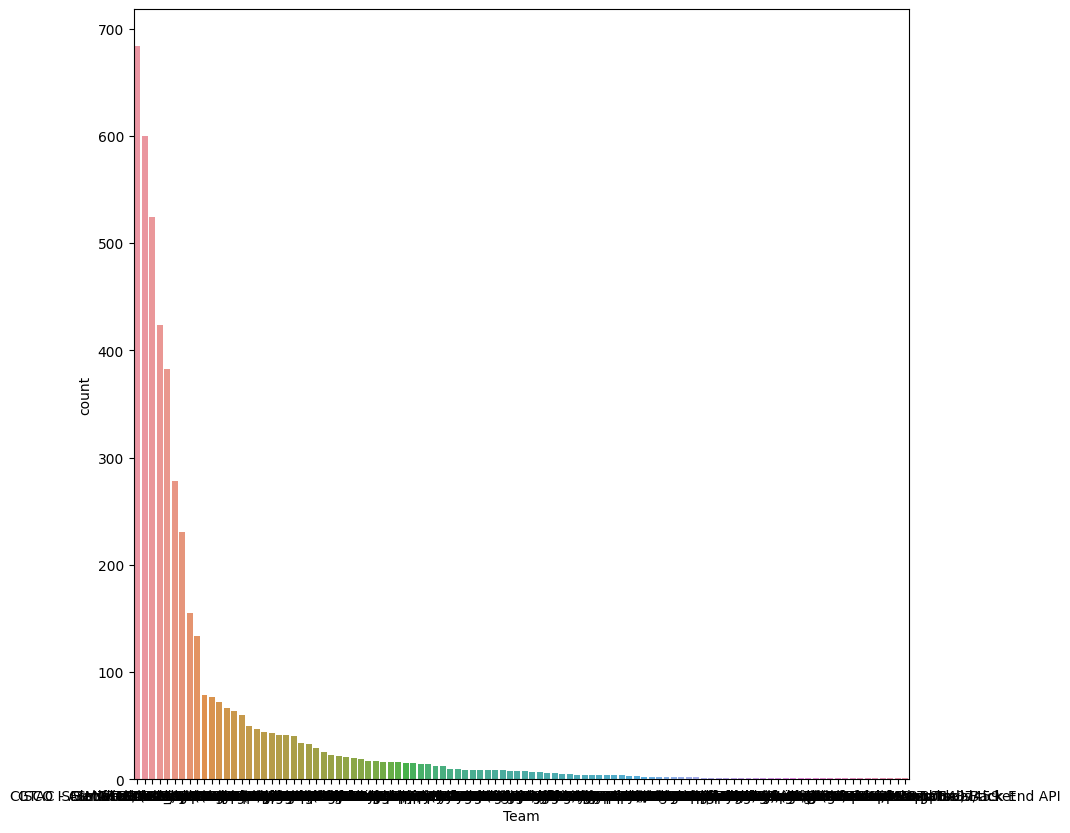

In [144]:
sns.barplot(data=team_counts, x='Team', y="count")

<AxesSubplot: xlabel='hr_duration', ylabel='Count'>

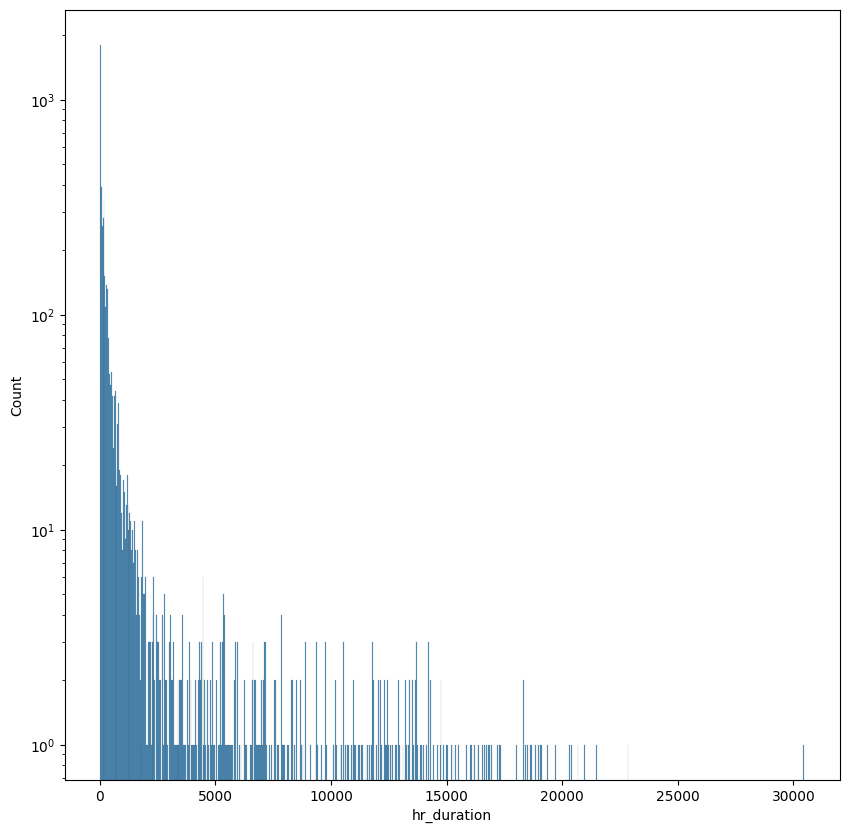

In [160]:
sns.histplot(data=data_supervised, x="hr_duration", log=True)

In [241]:
data_supervised

,Team,Ticket,Problem_Abstract,Ticket_Type,Ticket_Opened_Date,Ticket_Closed,Duration,hr_duration,open_day_of_week,close_day_of_week,...,Team_Unified Task Management System (UTMS),Team_VitalNet Problems or Errors,Team_cback,Team_global outage | UD,Team_iGEMS CoE,Team_iGEMS-NG (NextGEMS),Team_iGEMS-NG (NextGEMS) - New Customer,Team_iGEMS-NG (NextGEMS) - Other,Team_iGems Orchestrator,Team_iNote
0,Prognosis,272431733,The CUC Database is not running on DURPRIPT7B,User,2019-12-18 14:20:00,2022-07-27 20:49:00,952 days 06:29:00,22854.483333,2,2,...,0,0,0,0,0,0,0,0,0,0
1,SMARTS/GFP_CPE,271472293,OPEN CR:Alerts not being generated - trap ba...,User,2019-11-20 18:33:00,2021-12-23 10:44:00,763 days 16:11:00,18328.183333,2,3,...,0,0,0,0,0,0,0,0,0,0
2,INCM (Voyence),256576476,Enhancement to TWB Portal GPS SYNC Reports - A...,User,2019-02-19 19:34:00,2022-08-12 16:35:00,1269 days 21:01:00,30477.016667,1,4,...,0,0,0,0,0,0,0,0,0,0
3,ATTLAS,271503232,Duplicated/ triplicated exceptions on Exceptio...,User,2019-11-21 13:11:00,2021-11-07 11:22:00,716 days 22:11:00,17206.183333,3,6,...,0,0,0,0,0,0,0,0,0,0
4,VitalNet Problems or Errors,277339571,"vnsd90, HPE account, JuniperRPM VitalArt issue",User,2020-05-08 22:38:00,2021-12-23 10:44:00,593 days 12:06:00,14244.100000,4,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,GTAC - Other,312147646,Add new users to the Existing Domain Name: MS...,User,2022-07-29 17:39:00,2022-08-02 19:13:00,4 days 01:34:00,97.566667,4,1,...,0,0,0,0,0,0,0,0,0,0
4737,GTAC - Other,312152059,Add new users to the Existing Domain Name: MSS...,User,2022-07-29 20:34:00,2022-08-01 16:11:00,2 days 19:37:00,67.616667,4,0,...,0,0,0,0,0,0,0,0,0,0
4738,VitalNet Problems or Errors,312229727,Need password reset,User,2022-08-02 16:42:00,2022-08-02 21:33:00,0 days 04:51:00,4.850000,1,1,...,0,1,0,0,0,0,0,0,0,0
4739,GTAC,312605830,Customer needs access MSS_WOKA domain. This is...,User,2022-08-16 19:08:00,2022-08-24 14:38:00,7 days 19:30:00,187.500000,1,2,...,0,0,0,0,0,0,0,0,0,0


## 3 Modelling

In [238]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_supervised)

In [248]:
feature_index=data_supervised.filter(regex="open|close|is|Team").columns
feature_index.values

array(['Team', 'open_day_of_week', 'close_day_of_week',
       'open_calender_week', 'close_calender_week', 'open_month',
       'close_month', 'open_year', 'close_year', 'is_friday', 'Team_ACAT',
       'Team_ACS - Password reset', 'Team_ACS Syslog Parser',
       'Team_ACTION Config Audits', 'Team_ACTION Integrated Look Up',
       'Team_ACTION Suite', 'Team_ACTION Suite - Other',
       'Team_ACTION Web', 'Team_ADDTAC', 'Team_ADDTAC - Other',
       'Team_ADDTAC - Problem Management (ADDTAC Problem) ', 'Team_ART',
       'Team_ASHE', 'Team_ATN - Problem Management (ATN Problem)',
       'Team_ATTLAS', 'Team_Action report',
       'Team_Application Response Slow or Application Unreachable',
       'Team_Aruba ClearPass', 'Team_B2B VPN Viewer',
       'Team_BRAIN Web Site', 'Team_Barcode Asset Scan and Ship (BASS)',
       'Team_BizOps Database Shared Services', 'Team_CA/CM',
       'Team_CDI OBM',
       'Team_CISCO ISE - Network Device Update/Add/Delete',
       'Team_Ciena License 